<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/3Clustering/3.2DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBScan

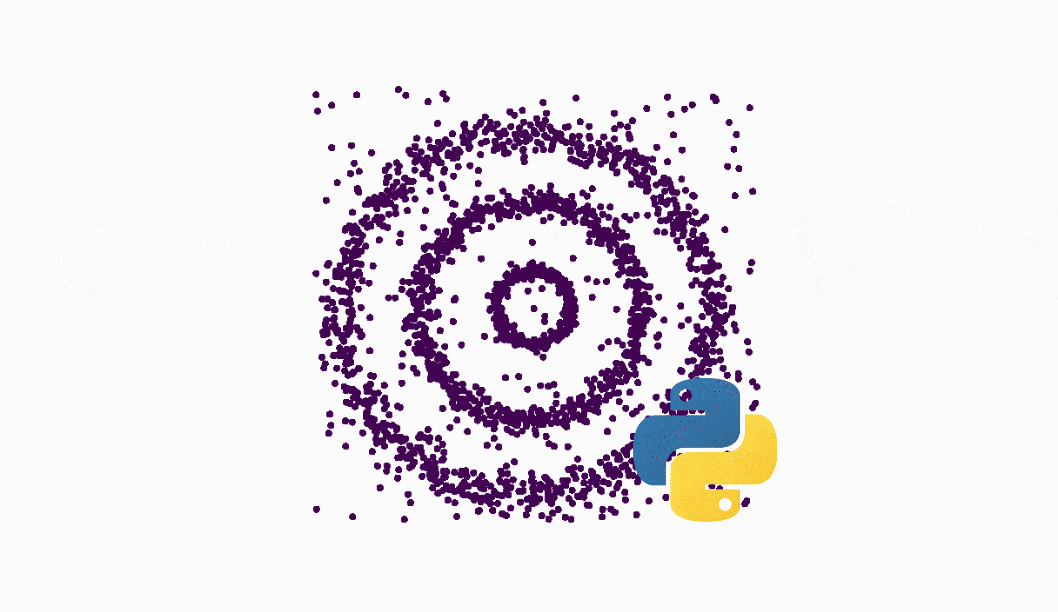

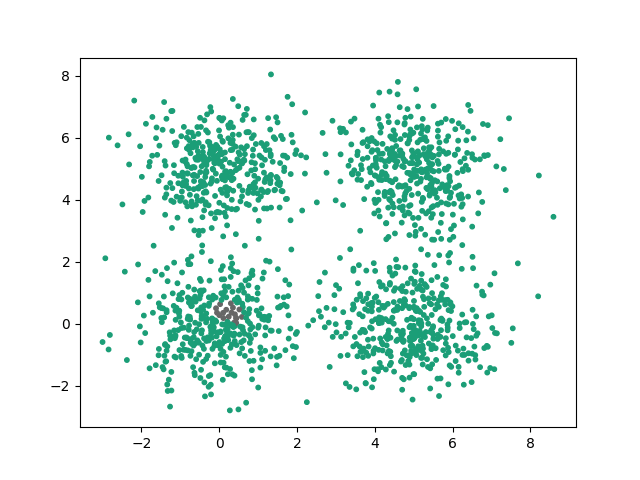

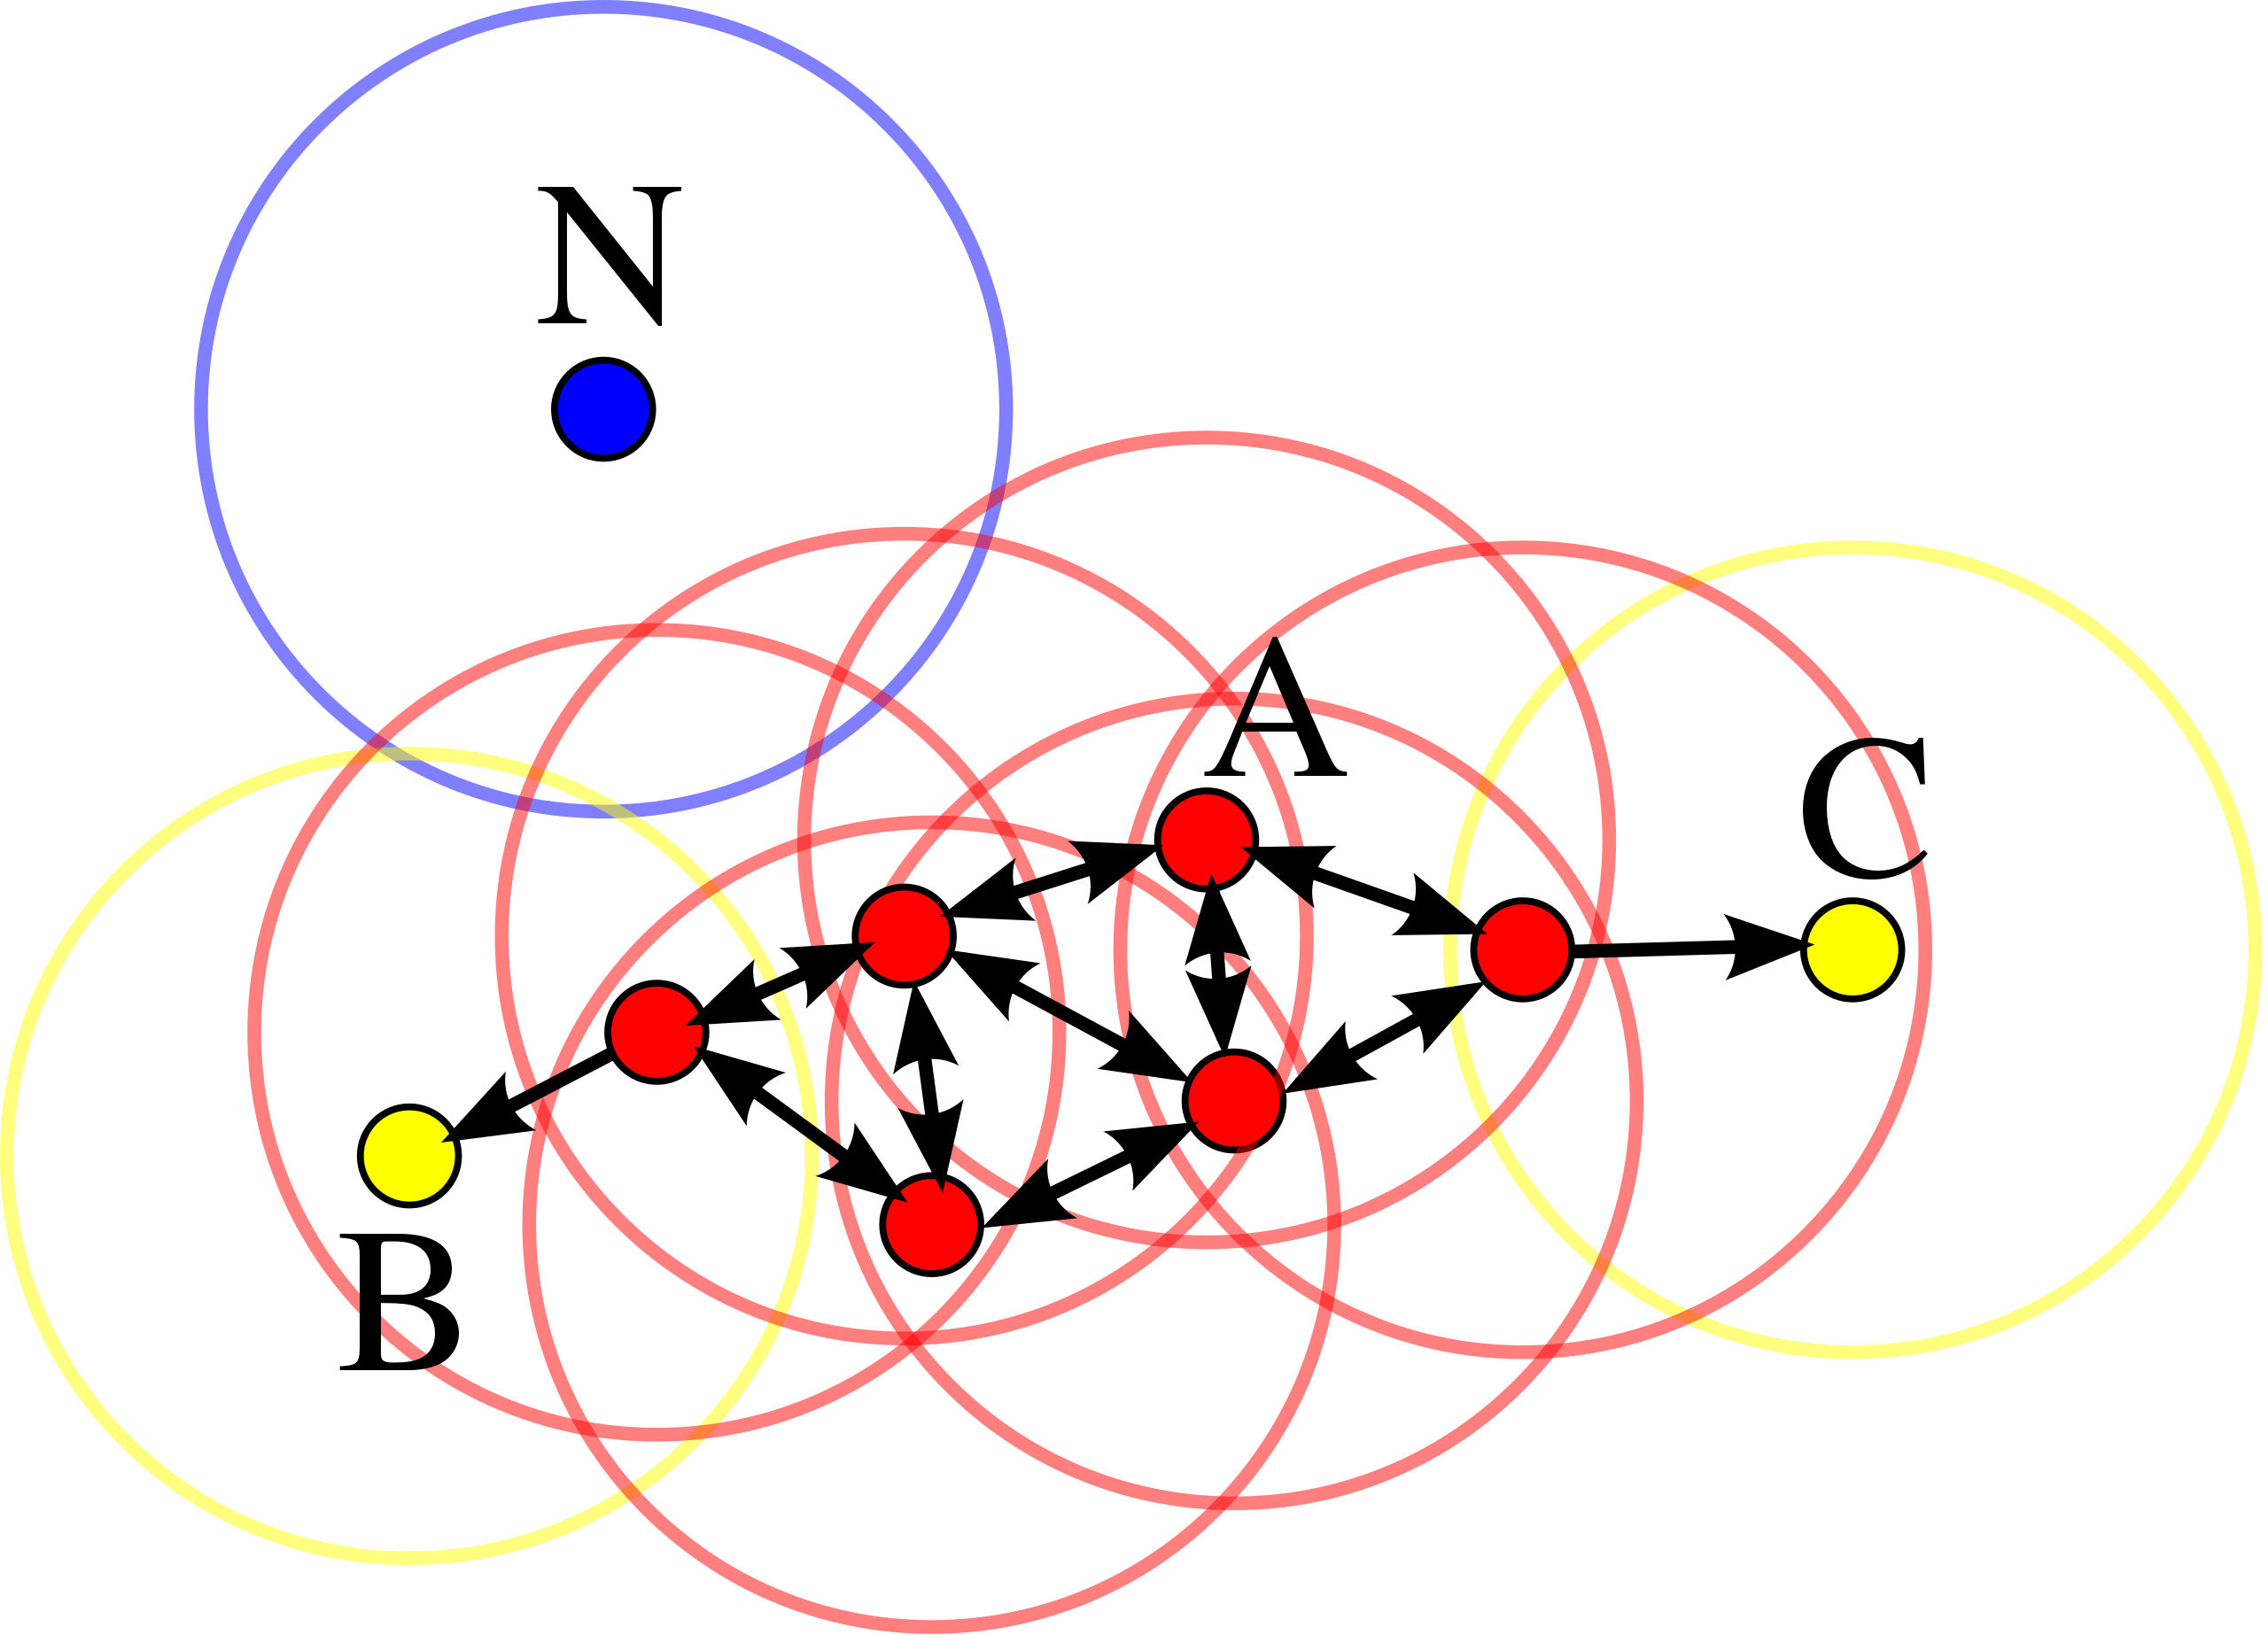

In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_circles

In [28]:
#read data

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom.xlsx')

Mounted at /content/gdrive


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


**Sample 1** (K-Means Vs DBScan)

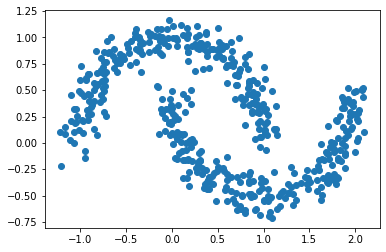

In [20]:
# make moon dataset

X, y = make_moons(n_samples=500, noise=0.1)
moon = pd.DataFrame(X,y)
plt.scatter(X[:,0], X[:,1])


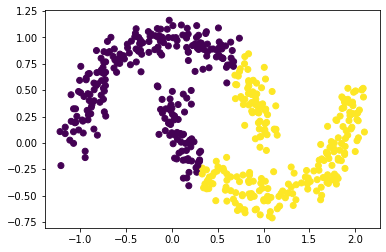

In [21]:
#K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Visualizing K-Means
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, );



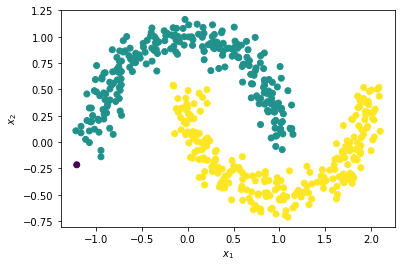

In [22]:
#DBScan
dbscan_cluster = DBSCAN(eps=0.2, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_, )
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


**Sample 2** (K-Means Vs DBScan)

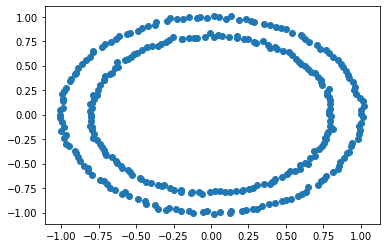

In [23]:
X, y = make_circles(n_samples=300, noise=0.01)
plt.scatter(X[:,0], X[:,1])


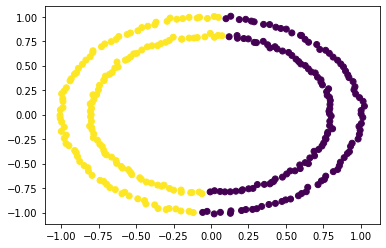

In [24]:
#K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Visualizing K-Means
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, )

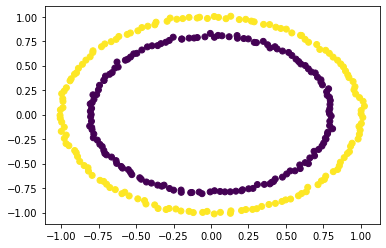

In [25]:
#DBScan
dbscan_cluster = DBSCAN(eps=0.1, min_samples=2)
dbscan_cluster.fit(X)

# Visualizing DBScan
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_, label=y)

**EscapeRoom**

In [29]:
df.head()

Number   M-F  Ave_Age  Prev_Ed  Ave_Exp  Ave_Fear  Hint  Ans  Plague  \
0       4  0.00    26.75       16     0.50     62.50     6    2       0   
1       5  0.20    31.20       16     1.40     77.00     7    4       0   
2       7  1.00    18.71       12     2.57     80.71    10    3       0   
3       7  0.14    21.86       16     2.14     45.00     6    2       0   
4       5  0.20    26.80       21     3.60     66.00     3    0       0   

   Progress  Victory  
0        87        0  
1        82        0  
2        81        0  
3       102        1  
4       111        1

In [34]:
X = df.values[:,:9]
Y = df.values[:,10:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [35]:
X_numerical = df[["Number", "M-F", "Ave_Age", "Prev_Ed", "Ave_Fear", "Hint", "Ans"]]

In [73]:
dbscan_cluster = DBSCAN(eps=3, min_samples=3)
dbscan_cluster.fit(X_numerical)


DBSCAN(eps=3, min_samples=3)

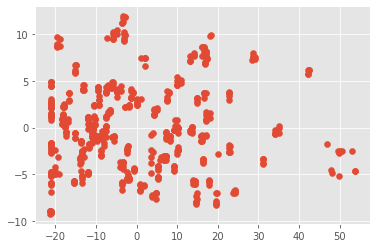

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.style.use('ggplot')
plt.scatter(X_pca[:,0],X_pca[:,1])

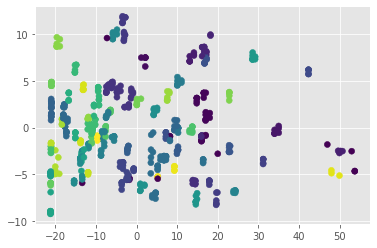

In [75]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_cluster.labels_, label=y)
